# CNN with MNIST dataset



In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

import tensorflow as tf
from tensorflow import keras

## Load and look at MNIST data

MNIST data are available from keras directly.

Note the shape of the data array: (number_of_samples, dimension_1, dimension_2)

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
display(train_images.shape)
display(len(train_labels))
display(len(test_labels))

(60000, 28, 28)

60000

10000

### QUIZZ

* How many pixels make an image?
* How many images does the dataset contain in total?
* How many images in the training dataset only?


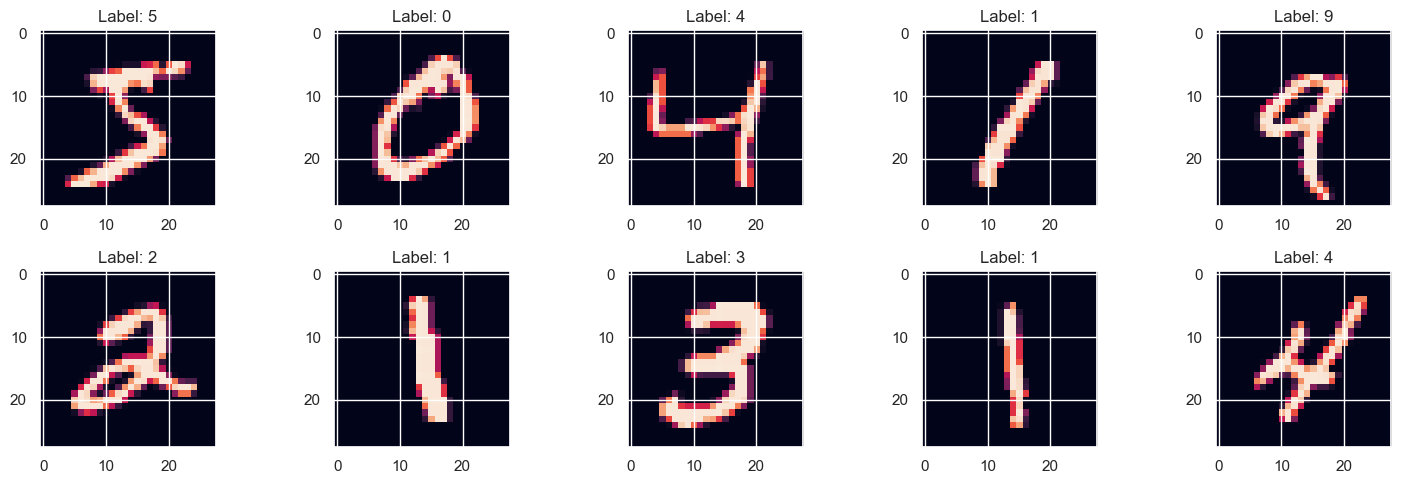

In [3]:
rows = 2
cols = 5
axes=[]
fig=plt.figure(figsize=(15,5))

for i in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, i+1) )
    subplot_title=("Label: "+str(train_labels[i]))
    axes[-1].set_title(subplot_title)  
    plt.imshow(train_images[i])
fig.tight_layout()    
plt.show()


## Prepare data subsets

The data are already separated in train and test sets at the loading step. This is specific to pre-processed datasets. Things to do:

* the labels are not in the categorical format. This must be done here.
* The input data are not in the appropriate shape. The images are in black and white, with only one array, and without any dimension for the channels. The channel dimension must be introduced for Keras.
* The input data are not normalized. This must be done.

In [4]:
train_labels_cat = keras.utils.to_categorical(train_labels)
test_labels_cat = keras.utils.to_categorical(test_labels)

In [5]:
print((train_images.max(), test_images.max()))
print((train_images.min(), test_images.min()))

(255, 255)
(0, 0)


In [6]:
train_images_res = train_images.reshape((60000, 28, 28, 1))/255
test_images_res  = test_images.reshape((10000, 28, 28, 1))/255

### QUIZZ

* What are the differences between the label arrays and the categorized label arrays? (shape and nature of values)


## Design a first model

In [7]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)))
## Introduction of the classifier
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(64, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                692288    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 693,098
Trainable params: 693,098
Non-trainable params: 0
_________________________________________________________________


## Training and checking overfitting

In [8]:
history = cnn.fit(x = train_images_res,
                  y = train_labels_cat,
                  validation_split = 0.2,
                  verbose = 1,
                  epochs = 10,
                  batch_size = 64)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 108us/sample - loss: 0.2033 - accuracy: 0.9406 - val_loss: 0.0931 - val_accuracy: 0.9719
Epoch 2/10
48000/48000 [==============================] - 5s 100us/sample - loss: 0.0666 - accuracy: 0.9800 - val_loss: 0.0756 - val_accuracy: 0.9775
Epoch 3/10
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0436 - accuracy: 0.9870 - val_loss: 0.0715 - val_accuracy: 0.9790
Epoch 4/10
48000/48000 [==============================] - 5s 101us/sample - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.0624 - val_accuracy: 0.9832
Epoch 5/10
48000/48000 [==============================] - 5s 102us/sample - loss: 0.0201 - accuracy: 0.9944 - val_loss: 0.0641 - val_accuracy: 0.9844
Epoch 6/10
48000/48000 [==============================] - 5s 100us/sample - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.0660 - val_accuracy: 0.9838
Epoch 7/10
48000/48000 [==========================

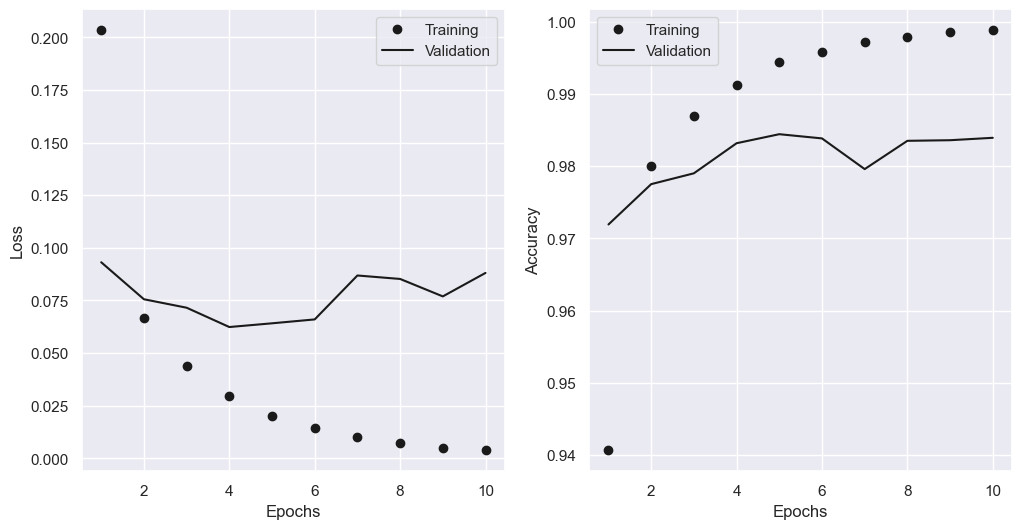

In [9]:
loss, val_loss = history.history['loss'], history.history['val_loss']
acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
epochs = range(1, len(loss)+1 )

plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
#ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(epochs, loss, 'ko', label = "Training" )
ax1.plot(epochs, val_loss, 'k', label = "Validation" )
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2 = plt.subplot(122)
#ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax2.plot(epochs, acc, 'ko', label = "Training" )
ax2.plot(epochs, val_acc, 'k', label = "Validation" )
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

## Make prediction with test dataset

The output is in the categorical format. For visualisation, it is changed to label format.

In [10]:
pred_labels_cat = cnn.predict(test_images_res)
pred_labels_cat

array([[1.31945172e-18, 1.67595872e-20, 4.54765565e-12, ...,
        1.00000000e+00, 4.68762568e-14, 7.99131161e-13],
       [7.07154379e-20, 3.84132576e-15, 1.00000000e+00, ...,
        1.82514908e-30, 2.40619318e-19, 3.32583651e-30],
       [1.02941371e-11, 9.99999523e-01, 2.35384734e-09, ...,
        2.97245180e-08, 4.42767572e-07, 6.66892444e-11],
       ...,
       [2.07940923e-27, 1.00994336e-17, 5.19859912e-20, ...,
        1.24579668e-13, 4.36948078e-14, 1.51540304e-12],
       [2.35394848e-23, 1.69484748e-28, 5.85353396e-27, ...,
        4.07626922e-22, 6.03596270e-11, 1.74287339e-21],
       [2.07953578e-20, 2.06033289e-27, 7.43340630e-17, ...,
        2.32834723e-28, 1.16157989e-21, 1.02718113e-28]], dtype=float32)

In [11]:
pred_labels_cat.shape

(10000, 10)

In [12]:
pred_labels = np.array([np.argmax(pred_labels_cat[i,:]) for i in range(10000)])
random_labels = np.random.randint(0,10,10000)

In [13]:
random_labels.shape

(10000,)

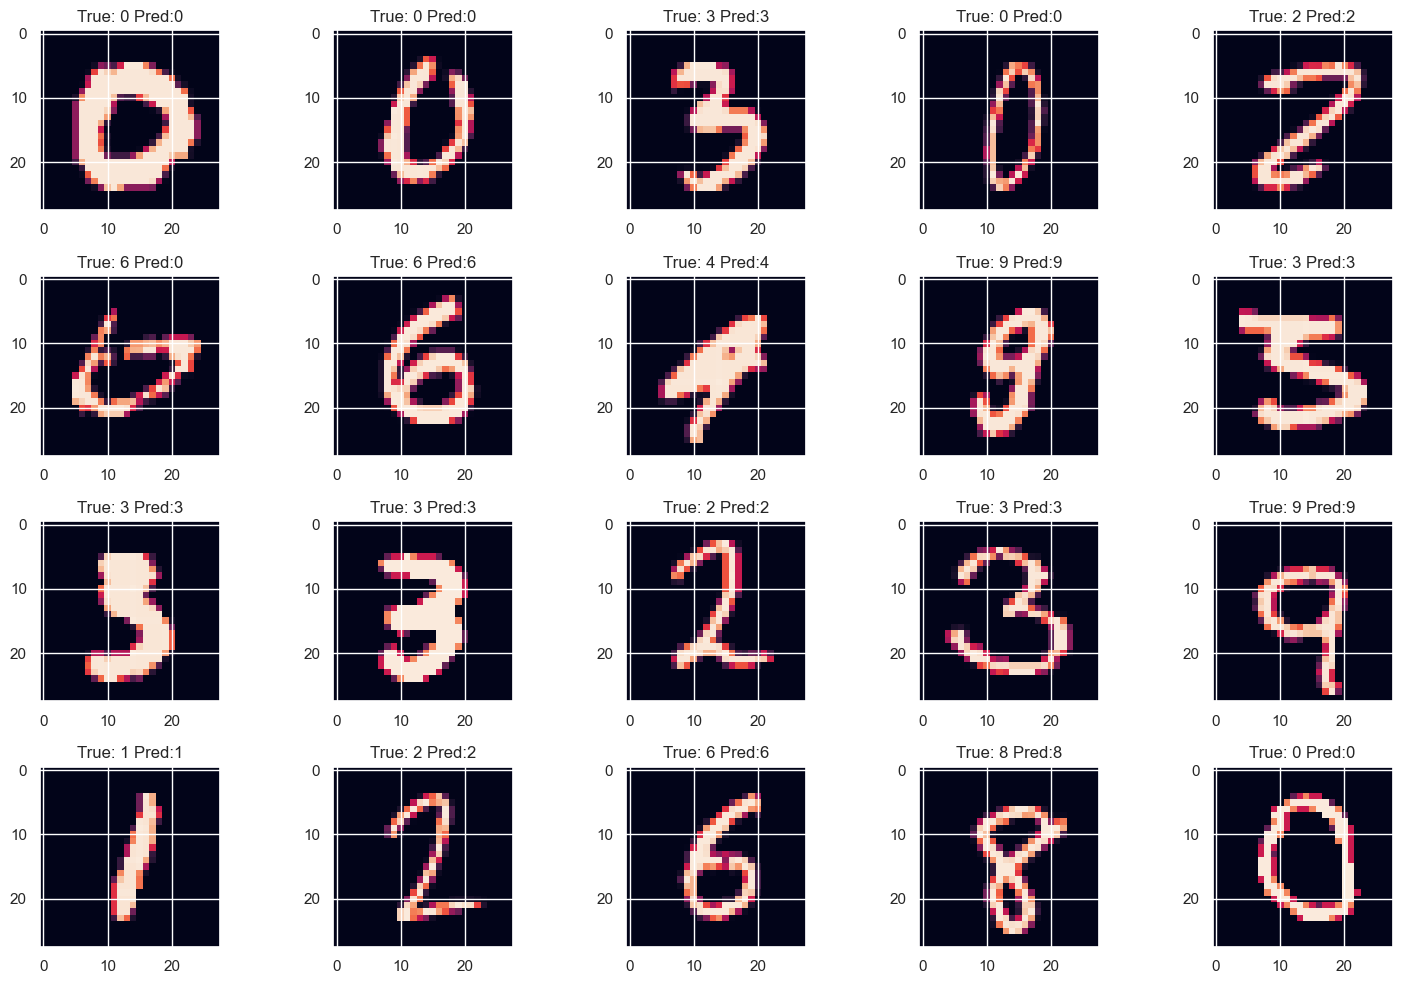

In [14]:
rows = 4
cols = 5
start = 440
axes=[]
fig=plt.figure(figsize=(15,10))

for i in range(rows*cols):
    j = start+i
    axes.append( fig.add_subplot(rows, cols, i+1) )
    #subplot_title=("T: "+str(test_labels[j])+" P:"+str(pred_labels[j])+" R:"+str(random_labels[j]))
    subplot_title=("True: "+str(test_labels[j])+" Pred:"+str(pred_labels[j]))
    axes[-1].set_title(subplot_title)  
    plt.imshow(test_images[j])
fig.tight_layout()    
plt.show()


In [15]:
cnn.evaluate(test_images_res, test_labels_cat)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.0747 - accuracy: 0.9838


[0.07470025499003916, 0.9838]

In [16]:
kernels = cnn.get_weights()

In [17]:
type(kernels), len(kernels)

(list, 6)

## Your turn

* Add a 0-padding to the convolutional layer
* Add one or two convolutional layers to the previous model.
* Add max-pooling and drop-out